# Multiomics modeling

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`task1_multiomics_ghaemi2019multiomics.pdf`).
The idea is to use biological measurements to characterize biological changes during pregnancy.
The authors use multiple modalities (measurements collected from the immune system, microbiome, etc.)
This includes whether we can predict the gestational age of a mother solely based on the collected biomarkers.

**Note**: There is no need to get acquainted with multiomics modeling, at least for this exercise. In the end, this is just a regular data science task :) 

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details pleaase see the paper.

In [1]:
# code for loading the data

import numpy as np
import pickle

with open("task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)
    
data_multiomics.head(5)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [2]:
# look at the immune system
data_multiomics["immune_system"].head(5)

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


## Tasks

### Gestational Age

1. **Predict `gestational_age`** using the `immune_system` modality using at least two models (e.g., elastic net and support vector machines)

2. **Evaluate** your models using a measure that you think fits best. If it is a different measure than in the paper, please briefly explain why.

3. For your best model, **plot the model predictions** similar to **Figure 2D**.


**Hint:** To train and evaluate models, you can use [scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).

**Figure 2D:**<br/>
<img src="assets/task1_multiomics_fig2d.jpeg">

In [11]:
############### The 1st ML model #####################

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

#threshold more that 1 increase the results until 1.4. more than 1.4, the result decrease and then it fixed. #####
noise_threshold = 1.4

#copy the full dataset for analysis
full_dataset = data_multiomics[::]

#check for missing data and replace them with the column means
mean_dict = {}
if full_dataset.isnull().sum().sum() != 0:
    for col in ['immune_system']:
        if full_dataset[col].isnull().sum() > 0:
            mean_val = np.mean(full_dataset[col])
            print(f"Column '{col}' contains missing values; replacing with mean ({mean_val})")
            full_dataset[col].fillna(mean_val, inplace=True)

#extract the 'immune_system' column from the dataset
X = full_dataset[['immune_system']].values

#find the quartiles for the whole data
Q1 = np.percentile(X[:, 0], 25)
Q3 = np.percentile(X[:, 0], 75)

#split the data into training and testing sets (80%/20%)
X = data_multiomics[['immune_system']].values
y = data_multiomics['gestational_age'].astype('category').cat.codes.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#computes the Interquartile Range (IQR) and sets lower and upper limits for data values based on the IQR 
#by representing the range containing the middle half of all data points in a dataset.
# the third quartile (Q3, or the 75th percentile) and the first quartile (Q1, or the 25th percentile)
IQR = Q3 - Q1
lower_limit = Q1 - noise_threshold * IQR
upper_limit = Q3 + noise_threshold * IQR

#This computation is needed to find noises in the dataset

#initialize an empty list to hold the indices of the rows to remove.
filtered_idx = []

for idx, x in enumerate(X_train[:, 0]):
    #check if the current sample value is smaller than the lower bound or larger than the upper bound.
    if x < lower_limit or x > upper_limit:
        filtered_idx.append(idx)
        
#remove the rows identified in 'filtered_idx' from both the X_train and y_train arrays
X_train = np.delete(X_train, filtered_idx, axis=0)
y_train = np.delete(y_train, filtered_idx, axis=0)

# update the quartiles
Q1 = np.percentile(X_train[:, 0], 25)
Q3 = np.percentile(X_train[:, 0], 75)
IQR = Q3 - Q1
lower_limit = Q1 - noise_threshold * IQR
upper_limit = Q3 + noise_threshold * IQR

#finding outliers
# keep track of outliers in the first feature of X_test
outliers_in_first_feature = []

initial_indices = range(len(X_test))
valid_indices = []
for idx, x in enumerate(X_test[:, 0]):
    if x < lower_limit or x > upper_limit:
        outliers_in_first_feature.append((idx, x))
    else:
        # Append the index corresponding to the non-outlier
        valid_indices.append(initial_indices[idx])

#filtered data 
X_test_filtered = X_test[valid_indices, :]
y_test_filtered = y_test[valid_indices]

print("Number of outliers:", len(outliers_in_first_feature))
print("Filtered number of records in X_test:", len(X_test_filtered), "\n")
print("Filtered number of records in y_test:", len(y_test_filtered), "\n")

# Train the SVC model
svc_model = svm.SVC()
svc_model.fit(X_train, y_train)

#predictions on the test set
svc_predictions = svc_model.predict(X_test)

# Apply filtering to predicted labels
svc_predictions_filtered = [svc_predictions[idx] for idx in valid_indices]

# Calculate metrics
accuracy = accuracy_score(y_test_filtered, svc_predictions_filtered)
precision = precision_score(y_test_filtered, svc_predictions_filtered, average='weighted', zero_division=0)
recall = recall_score(y_test_filtered, svc_predictions_filtered, average='weighted', zero_division=0)
f1_score = f1_score(y_test_filtered, svc_predictions_filtered, average='weighted', zero_division=0)

print("\nSupport Vector Classification Metrics:")
print(f"Accuracy:{accuracy * 100:.2f}%")
print(f"Precision:{precision * 100:.2f}%")
print(f"Recall (Sensitivity):{recall * 100:.2f}%")
print(f"F1 Score:{f1_score * 100:.2f}%")

Number of outliers: 1
Filtered number of records in X_test: 13 

Filtered number of records in y_test: 13 


Support Vector Classification Metrics:
Accuracy:30.77%
Precision:9.47%
Recall (Sensitivity):30.77%
F1 Score:14.48%


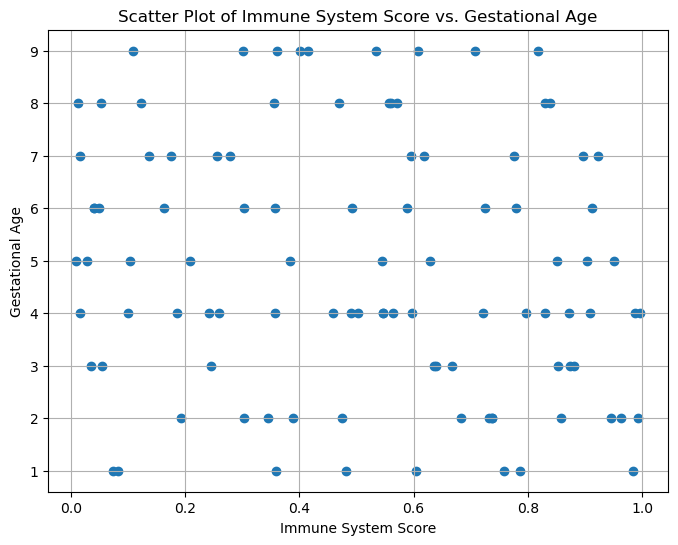

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#the modals
immune_system = np.random.rand(100)
gestational_age = np.random.randint(1, 10, size=100)

#create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(immune_system, gestational_age)
plt.xlabel('Immune System Score')
plt.ylabel('Gestational Age')
plt.title('Scatter Plot of Immune System Score vs. Gestational Age')
plt.grid(True)

#Show the plot
plt.show()

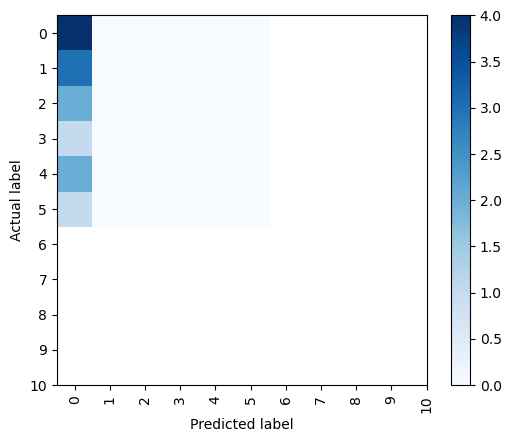

In [13]:
from sklearn.metrics import confusion_matrix

#generate confusion matrix
cm = confusion_matrix(y_test_filtered, svc_predictions_filtered)

#display the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], range(11), rotation=90)
plt.yticks(range(11), range(11))
plt.colorbar()
plt.xlabel('Predicted label'); plt.ylabel('Actual label')
plt.show();

In [16]:
# import required modules
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# prepare the data
X = data_multiomics['immune_system']
y = data_multiomics['gestational_age']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# build the Elastic Net model
alpha = 0.1 # regularization parameter
l1_ratio = 0.9 # ratio of L1 penalty to total penalty
elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# fit the model to the training data
elasticnet.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = elasticnet.predict(X_test_scaled)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2)

Mean Squared Error: 111.06459419972941
Root Mean Squared Error: 10.538718812062944
R^2 Score: -0.09280424011781974


In [20]:
############### in ghesmato taghir bedam #################################################

# add acolumn 
X_train_scaled_plus = sm.add_constant(X_train_scaled)
X_test_scaled_plus = sm.add_constant(X_test_scaled)

# estimate the OLS model
ols = sm.OLS(endog=y_train, exog=X_train_scaled_plus).fit()

# print out the summary statistics
print(ols.summary())

# calculate R^2 and R^2 adj
r2 = ols.rsquared
r2_adj = 1 - (1 - r2)*((len(y_train)-1)/(len(y_train)-X_train_scaled_plus.shape[1]))
print('R^2:', r2)
print('Adjusted R^2:', r2_adj)

C:\Users\Soheila\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Soheila\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Soheila\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:        gestational_age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                nan
Time:                        04:10:30   Log-Likelihood:                 1523.6
No. Observations:                  54   AIC:                            -2939.
Df Residuals:                       0   BIC:                            -2832.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3889        inf          0        n

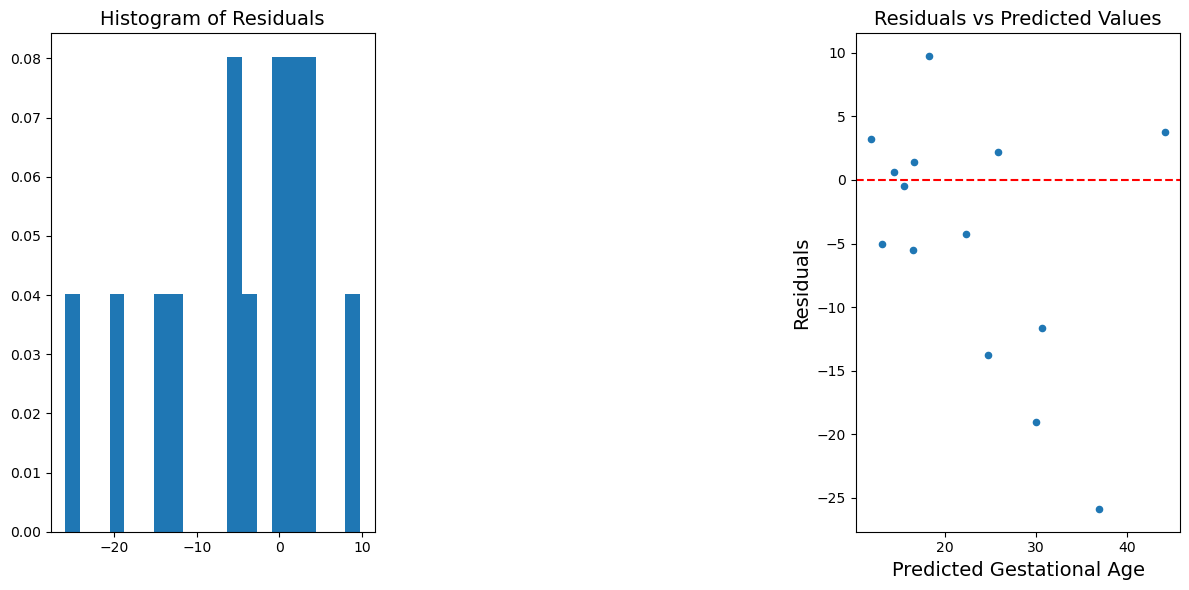

In [24]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

# Histogram of residuals
plt.subplot(1, 3, 1)
plt.hist(residuals, bins=20, density=True)
plt.title('Histogram of Residuals', fontsize=14)


# Scatter plot of residuals against predicted values
plt.subplot(1, 3, 3)
plt.scatter(y_pred, residuals, s=10)
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Gestational Age', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.tight_layout()
plt.show()

### Sex of the baby

Try using a neural network in Tensorflow or PyTorch to predict the sex of the baby.

In [27]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = data_multiomics[['gestational_age']].values.reshape(-1, 1)
y = data_multiomics['Sex']

# Convert sex labels to integers 
label_dict = {'Male': 0, 'Female': 1}
y = np.array([label_dict[i] for i in y])

# Normalize gestational age values to range [0, 1]
X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



## Predict using new data

new_data = pd.DataFrame({'gestational_age': [8,11,34,38, 42, 39, 27, 41]}) 

X_new = new_data[['gestational_age']].values.reshape(-1, 1)
X_new_norm = (X_new - norm_range.min()) / (norm_range.max() - norm_range.min())

predictions = model.predict(X_new_norm)

# Map integer labels back to their respective strings
reverse_label_dict = {v: k for k, v in label_dict.items()}

predicted_labels = ['Male' if int(prediction) == 0 else 'Female' for prediction in predictions]

print("Predictions:", predicted_labels)

Epoch 1/50
2/2 [==============================] - 1s 265ms/step - loss: 0.6954 - accuracy: 0.4074 - val_loss: 0.6900 - val_accuracy: 0.6429
Epoch 2/50
2/2 [==============================] - 0s 51ms/step - loss: 0.6942 - accuracy: 0.4630 - val_loss: 0.6914 - val_accuracy: 0.6429
Epoch 3/50
2/2 [==============================] - 0s 45ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 48ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.4286
Epoch 5/50
2/2 [==============================] - 0s 48ms/step - loss: 0.6923 - accuracy: 0.5556 - val_loss: 0.6952 - val_accuracy: 0.4286
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 0.6918 - accuracy: 0.5556 - val_loss: 0.6961 - val_accuracy: 0.4286
Epoch 7/50
2/2 [==============================] - 0s 48ms/step - loss: 0.6914 - accuracy: 0.5556 - val_loss: 0.6970 - val_accuracy: 0.4286
Epoch 8/50
2/2 [==========

However, there is a problem here I cannot solve for not, and that is the prediction. It predicts only the Male gender, which is not always true and affects precision and recall. I examined some scenarios, like changing the threshold, data, etc. I even used task 3, examining the code and data of this project, to get an insight into solving this issue. However, the only change I saw was that the prediction became only for females! :|
I did not change the code entirely because of the time limitation. However, observing data precisely to re-normalize it and find the quantities that make biases in the model is necessary. 

References I used to learn or solve the errors:

1. https://www.educative.io/answers/how-to-implement-svm-in-python-using-scikit-learn
2. https://medium.com/@aqureshi/using-support-vector-machine-svm-classifier-in-python-to-predict-heart-disease-with-framingham-fed646b97067
3. https://www.kaggle.com/code/samdemharter/multi-omics-integration-with-the-qlattice
4. https://www.jiristodulka.com/post/supervised-ml/
5. StackoverFlow
6. AI agents 

### Feedback

Were the tasks above difficult, easy, or a mixture? In both cases, briefly describe why.

It was so difficult for me. Having different models was the data. I didn't work on it or worked before, but I didn't remember. Since I am experienced in NLP, this is my first time performing on a Biomedical numeric dataset like this. Therefore, I spent most of my time understanding the data and questions. However, I searched and learned, and now I am happy to have an experience of working on this kind of dataset. This project was indeed so interesting. 